## Data Modeling 

In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [274]:
df = pd.read_csv(r'C:\Users\tonym\Documents\Flatiron\phase_2\Project2\notebooks\Tony\cleanhousedata.csv')

In [275]:
df.head()

,price,view,sqft_living,sqft_lot,bedrooms,bathrooms
0,221900.0,NONE,1180,5650,2,2
1,538000.0,NONE,2570,7242,2,7
2,180000.0,NONE,770,10000,1,2
3,604000.0,NONE,1960,5000,3,10
4,510000.0,NONE,1680,8080,2,6


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20454 entries, 0 to 20453
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        20454 non-null  float64
 1   view         20454 non-null  object 
 2   sqft_living  20454 non-null  int64  
 3   sqft_lot     20454 non-null  int64  
 4   bedrooms     20454 non-null  int64  
 5   bathrooms    20454 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 958.9+ KB


In [276]:
df.corr().abs()['price'].sort_values(ascending=False)

price          1.000000
sqft_living    0.627416
bathrooms      0.460498
bedrooms       0.305282
sqft_lot       0.097379
Name: price, dtype: float64

### Function to Check Linearity 

In [228]:
def check_assumptions(X_train, y_train, train_preds, test_preds, y_test):
    """
    Creates graphs to assist in checking the assumptions of linearity.

    :param X_train: X values of model
    :param y_train: Values for 'price' in training dataset
    :param train_preds: Predicted values for 'price' in training dataset
    :param test_preds: Predicted values for 'price' in test dataset
    :param y_test: Values for 'price' in training dataset
    :return:
    """
    # Check Linearity
    train_df = pd.concat([X_train, y_train], axis=1)
    train_df.corr().price.sort_values(ascending=False)
    sns.pairplot(train_df)
    plt.show()

    # Check Multicollinearity
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(train_df.corr(), annot=True, )
    plt.show()

    # Check for residual normality
    train_residuals = y_train - train_preds
    sm.qqplot(train_residuals, line='r');
    test_residuals = y_test - test_preds
    sm.qqplot(test_residuals, line='r');

    # Checking heteroskedacity
    plt.scatter(train_preds, train_residuals, label='Train')
    plt.scatter(test_preds, test_residuals, label='Test')

    plt.axhline(y=0, color='red', label='0')
    plt.xlabel('predictions')
    plt.ylabel('residuals')
    plt.legend()
    plt.show()


In [229]:
def evaluate(y_train, train_preds, y_test, test_preds):
    """
    Evaluates the  R2, RMSE, and MAE scores of a model.

    :param y_tr: Values for 'price' in training dataset
    :param tr_preds: Predicted values for 'price' in training dataset
    :param y_te:  Values for 'price' in training dataset
    :param te_preds: Predicted values for 'price' in test dataset
    :return: None
    """
    print(f"Train R2: {r2_score(y_train, train_preds):.4f}")
    print(f"Test R2: {r2_score(y_test, test_preds):.4f}")
    print("****")
    print(f"Train RMSE: ${mean_squared_error(y_train, train_preds, squared=False):,.2f}")
    print(f"Test RMSE: ${mean_squared_error(y_test, test_preds, squared=False):,.2f}")
    print("****")
    print(f"Train MAE: ${mean_absolute_error(y_train, train_preds):,.2f}")
    print(f"Test MAE: ${mean_absolute_error(y_test, test_preds):,.2f}")

### Begin to split into train and test 

In [230]:
X = df.drop(columns=['price', 'sqft_lot', 'view'])
y = df['price']

In [231]:
# Train / Test Split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [232]:
# Make a train df so we can see X versus y in our train data
train_df = pd.concat([X_train, y_train], axis=1)
train_df

,sqft_living,bedrooms,bathrooms,price
15794,1880,2,5,395900.0
83,1610,1,7,215000.0
19716,2420,2,8,369946.0
925,2970,4,8,469500.0
6584,720,1,2,280000.0
...,...,...,...,...
11284,1780,3,2,336000.0
11964,1200,2,2,190000.0
5390,900,2,2,329000.0
860,2160,4,9,550000.0


In [233]:
print("X train:")
display(X_train.describe())
print("X Test:")
display(X_test.describe())

X train:


,sqft_living,bedrooms,bathrooms
count,13704.000000,13704.000000,13704.000000
mean,1976.351503,2.325088,6.206655
std,779.929044,0.881373,2.851640
min,370.000000,0.000000,0.000000
25%,1400.000000,2.000000,4.000000
50%,1850.000000,2.000000,6.000000
75%,2430.000000,3.000000,8.000000
max,7350.000000,11.000000,26.000000


X Test:


,sqft_living,bedrooms,bathrooms
count,6750.000000,6750.000000,6750.000000
mean,1990.854519,2.349778,6.254370
std,786.209050,0.904801,2.849987
min,420.000000,0.000000,0.000000
25%,1410.000000,2.000000,4.000000
50%,1870.000000,2.000000,7.000000
75%,2450.000000,3.000000,8.000000
max,7480.000000,9.000000,25.000000


In [234]:
X_train.head()

,sqft_living,bedrooms,bathrooms
15794,1880,2,5
83,1610,1,7
19716,2420,2,8
925,2970,4,8
6584,720,1,2


 ## Model of sqft_living and price 

In [235]:
model = sm.OLS(y_train, sm.add_constant(X_train['sqft_living'])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     8686.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:42:42   Log-Likelihood:            -1.8410e+05
No. Observations:               13704   AIC:                         3.682e+05
Df Residuals:                   13702   BIC:                         3.682e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         1.45e+05   3846.500     37.702      0.000    1.37e+05    1.53e+05
sqft_living   168.7308      1.810     93.201      0.000     165.182     172.279
==============================================================================
Omnibus:                      710.128   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              826.734
Skew:                           0.578   Prob(JB):                    3.00e-180
Kurtosis:                       3.331   Cond. No.                     5.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [236]:
# #from sklearn.linear_model import LinearRegression
# #lr = LinearRegression()

# lr.fit(X_train, y_train)

# train_preds = lr.predict(X_train)
# test_preds = lr.predict(X_test)

In [237]:
train_preds = model.predict(sm.add_constant(X_train['sqft_living']))
test_preds = model.predict(sm.add_constant(X_test['sqft_living']))

#### Evaluate the R2, RMSE, and MAE scores

In [238]:
evaluate(y_train, train_preds, y_test, test_preds)

Train R2: 0.3880
Test R2: 0.4051
****
Train RMSE: $165,274.57
Test RMSE: $162,786.65
****
Train MAE: $132,560.46
Test MAE: $131,028.85


### Check linear assumptions sqft_living and Price 

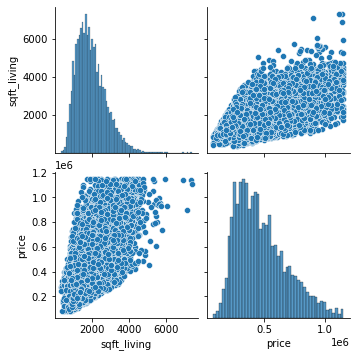

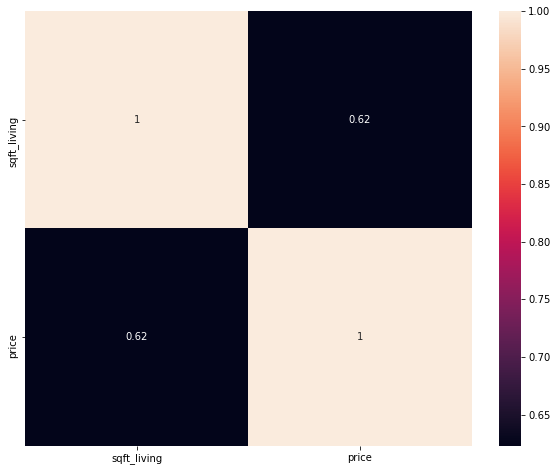

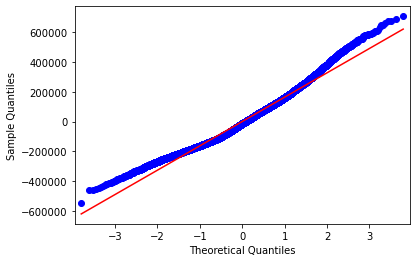

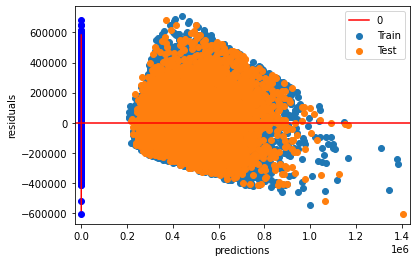

In [239]:
check_assumptions(X_train['sqft_living'], y_train, train_preds, test_preds, y_test)

### Model Conclusion

- I was expecting a higher r2 score because the sqft_living correlation was higher when I checking it against price. The r2 square scored was still pretty high compared to most of the models tested in this project 
- This was my baseline model because sqft_living seemed to have the highest correlation to price sold 
- I believe it also does violate the last two linear regression assumptions of residual normality and heteroskedacity. 



## Model of bedrooms and price 

In [240]:
model = sm.OLS(y_train, sm.add_constant(X_train['bedrooms'])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     1330.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          5.38e-278
Time:                        15:42:44   Log-Likelihood:            -1.8683e+05
No. Observations:               13704   AIC:                         3.737e+05
Df Residuals:                   13702   BIC:                         3.737e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.127e+05   4861.453     64.325      0.000    3.03e+05    3.22e+05
bedrooms     7.13e+04   1955.121     36.469      0.000    6.75e+04    7.51e+04
==============================================================================
Omnibus:                      944.930   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1153.598
Skew:                           0.709   Prob(JB):                    3.16e-251
Kurtosis:                       3.091   Cond. No.                         8.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [241]:
train_preds = model.predict(sm.add_constant(X_train['bedrooms']))
test_preds = model.predict(sm.add_constant(X_test['bedrooms']))

#### Evaluate the R2, RMSE, and MAE scores

In [242]:
evaluate(y_train, train_preds, y_test, test_preds)


Train R2: 0.0885
Test R2: 0.1027
****
Train RMSE: $201,701.66
Test RMSE: $199,929.72
****
Train MAE: $162,637.06
Test MAE: $161,306.02


### Check linear assumptions Bedrooms and Price 

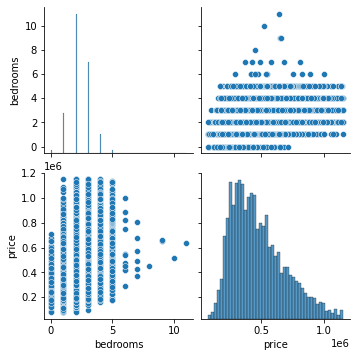

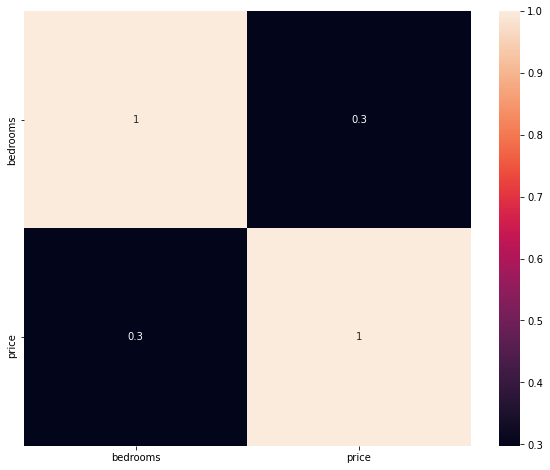

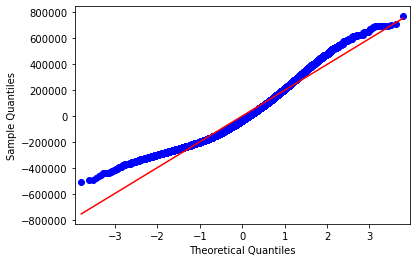

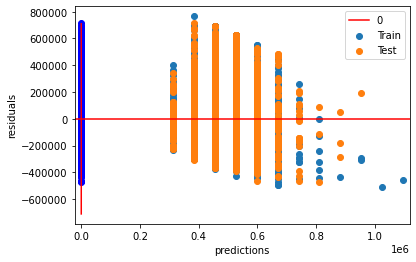

In [243]:
check_assumptions(X_train['bedrooms'], y_train, train_preds, test_preds, y_test)

### Model Conclusion

- This model had my lowest R squared score, the test R squared was a little higher 
- Again some linear assumptions were violated such as residual normality
- The rmses are quite high in this model as well which shows the model is not as accurate as it would appear from the rsquared score 



## Model of bathrooms and price 

In [244]:
model = sm.OLS(y_train, sm.add_constant(X_train['bathrooms'])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     3566.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:42:46   Log-Likelihood:            -1.8588e+05
No. Observations:               13704   AIC:                         3.718e+05
Df Residuals:                   13702   BIC:                         3.718e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.695e+05   3850.951     69.989      0.000    2.62e+05    2.77e+05
bathrooms   3.367e+04    563.799     59.717      0.000    3.26e+04    3.48e+04
==============================================================================
Omnibus:                      902.292   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1089.162
Skew:                           0.685   Prob(JB):                    3.10e-237
Kurtosis:                       3.178   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [245]:
train_preds = model.predict(sm.add_constant(X_train['bathrooms']))
test_preds = model.predict(sm.add_constant(X_test['bathrooms']))

#### Evaluate the R2, RMSE, and MAE scores

In [246]:
evaluate(y_train, train_preds, y_test, test_preds)

Train R2: 0.2065
Test R2: 0.2232
****
Train RMSE: $188,189.42
Test RMSE: $186,020.45
****
Train MAE: $151,233.08
Test MAE: $149,312.05


### Check linear assumptions bathrooms and Price 

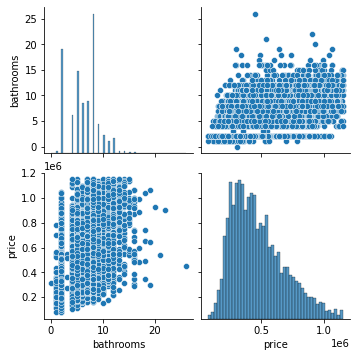

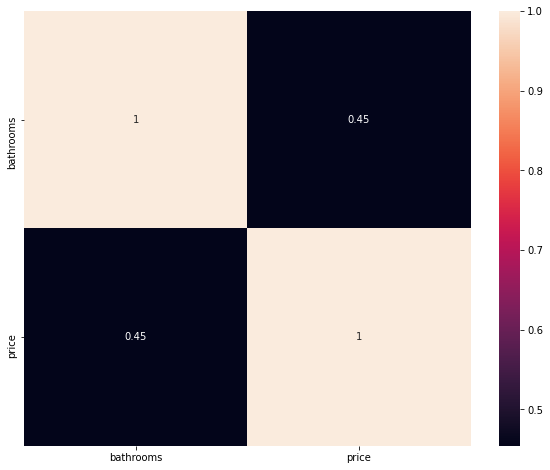

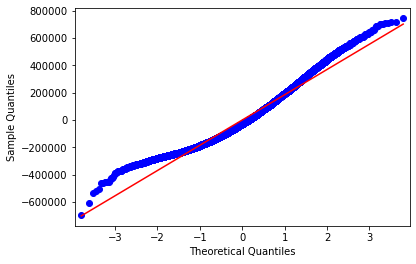

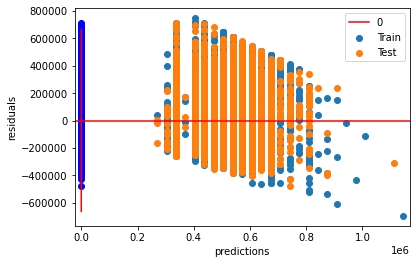

In [247]:
check_assumptions(X_train['bathrooms'], y_train, train_preds, test_preds, y_test)

### Model Conclusions 

- This model performed better then the bedrooms and bathrooms model. I think this is beacuase what a bedroom is can be ambigious and I think a greater number of bedrooms could fit into a smaller house. If there are a greater number of bathrooms there is a better chance of the house being larger 


## Model of bedrooms and bathrooms and price 

In [248]:
model = sm.OLS(y_train, sm.add_constant(X_train[['bedrooms', 'bathrooms']])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     1854.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:42:47   Log-Likelihood:            -1.8583e+05
No. Observations:               13704   AIC:                         3.717e+05
Df Residuals:                   13701   BIC:                         3.717e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.391e+05   4785.862     49.967      0.000     2.3e+05    2.49e+05
bedrooms    2.229e+04   2099.683     10.617      0.000    1.82e+04    2.64e+04
bathrooms   3.021e+04    648.961     46.558      0.000    2.89e+04    3.15e+04
==============================================================================
Omnibus:                      864.162   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1035.078
Skew:                           0.668   Prob(JB):                    1.72e-225
Kurtosis:                       3.171   Cond. No.                         22.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [249]:
train_preds = model.predict(sm.add_constant(X_train[['bedrooms','bathrooms']]))
test_preds = model.predict(sm.add_constant(X_test[['bedrooms','bathrooms']]))

#### Evaluate the R2, RMSE, and MAE scores

In [250]:
evaluate(y_train, train_preds, y_test, test_preds)

Train R2: 0.2130
Test R2: 0.2312
****
Train RMSE: $187,420.06
Test RMSE: $185,060.99
****
Train MAE: $150,729.98
Test MAE: $148,546.50


### Check linear assumptions bedrooms/bathrooms and Price 

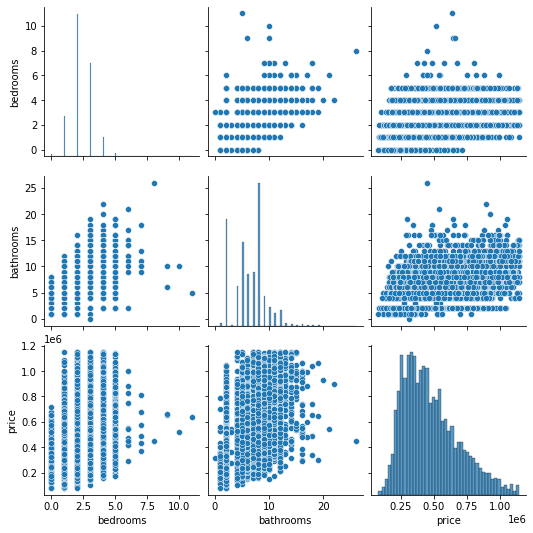

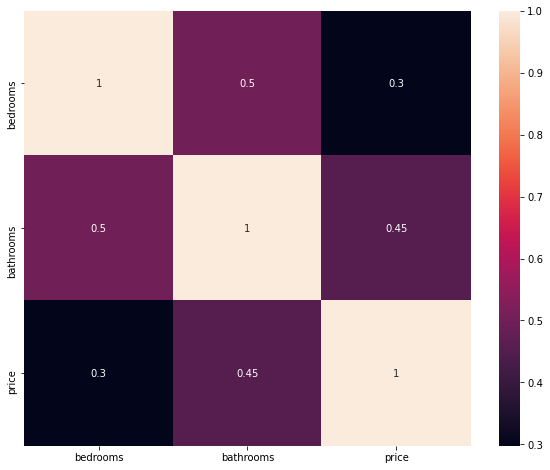

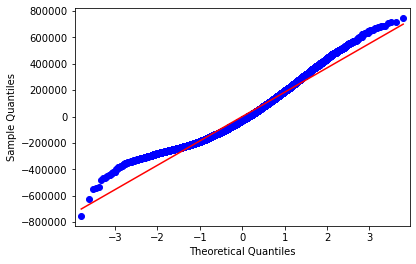

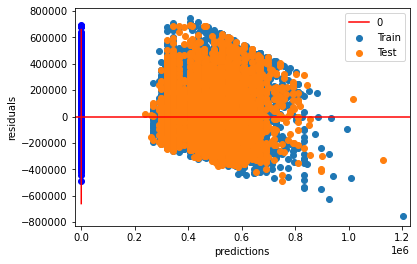

In [251]:
check_assumptions(X_train[['bedrooms', 'bathrooms']], y_train, train_preds, test_preds, y_test)

### Model Conclusions

- The issue of multicollinearity beacomes a problem here. This model may not give valid results of an indivdual prediction. 
-

## Model of bathroom/sqft_living and price 

In [255]:
model = sm.OLS(y_train, sm.add_constant(X_train[['sqft_living', 'bathrooms']])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     4346.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:10:34   Log-Likelihood:            -1.8410e+05
No. Observations:               13704   AIC:                         3.682e+05
Df Residuals:                   13701   BIC:                         3.682e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.435e+05   3916.423     36.647      0.000    1.36e+05    1.51e+05
sqft_living   164.9900      2.587     63.780      0.000     159.919     170.061
bathrooms    1432.1894    707.511      2.024      0.043      45.371    2819.008
==============================================================================
Omnibus:                      715.126   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              833.321
Skew:                           0.581   Prob(JB):                    1.11e-181
Kurtosis:                       3.331   Cond. No.                     5.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [256]:
train_preds = model.predict(sm.add_constant(X_train[['sqft_living','bathrooms']]))
test_preds = model.predict(sm.add_constant(X_test[['sqft_living','bathrooms']]))

#### Evaluate the R2, RMSE, and MAE scores

In [257]:
evaluate(y_train, train_preds, y_test, test_preds)

Train R2: 0.3882
Test R2: 0.4053
****
Train RMSE: $165,249.86
Test RMSE: $162,758.05
****
Train MAE: $132,528.24
Test MAE: $130,987.63


### Check linear assumptions bathrooms/sqft_living and Price 

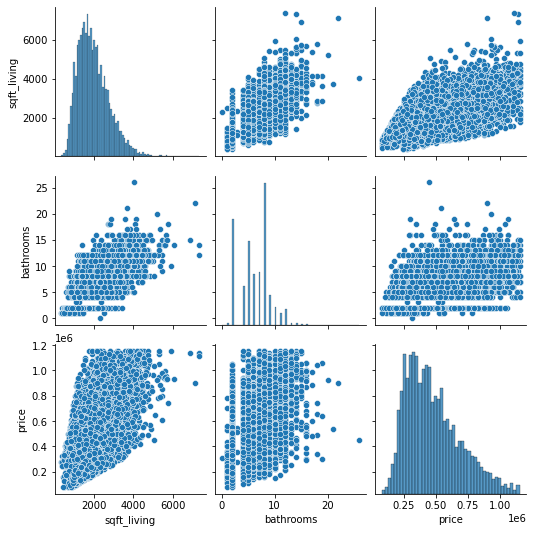

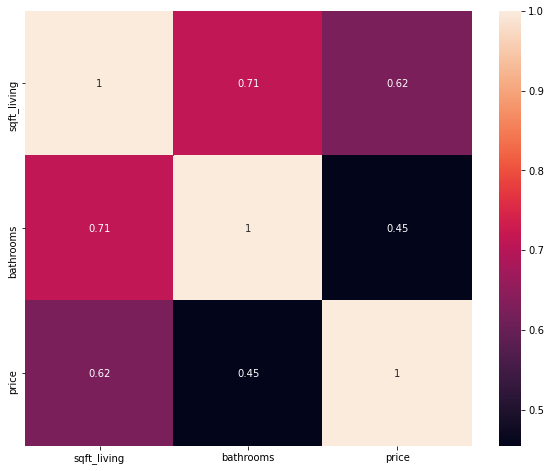

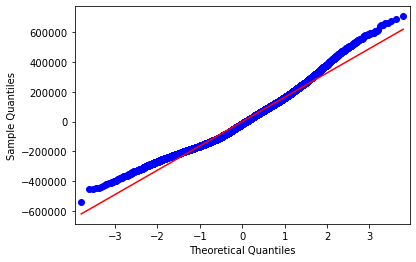

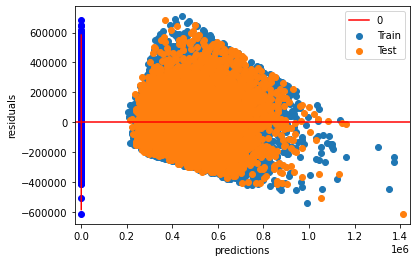

In [198]:
check_assumptions(X_train[['sqft_living', 'bathrooms']], y_train, train_preds, test_preds, y_test)

### Model Conclusion 

- This model had the same exact Rsquared as the model with just sqft_living in it. 
- The rmses are also quite similar 


### Testing different clean database

In [258]:
cl_df =  pd.read_csv('../../Data/combined_clean_data.csv', index_col=0)

In [259]:
cl_df.head()

,id,price_x,grade_x,date_x,yr_built_x,yr_renovated_x,floors_1.5,floors_2.0,floors_2.5,floors_3.0,...,view_y,waterfront,zipcode,lat,long,cat_waterfront,cat_view,cat_condition,cat_grade,cat_zipcode
0,7129300520,221900.0,4,2014-10-13,1955,NaN,0,0,0,0,...,NONE,NaN,98178,47.5112,-122.257,NaN,NONE,Average,7 Average,98178
1,6414100192,538000.0,4,2014-12-09,1951,1991.0,0,1,0,0,...,NONE,NO,98125,47.7210,-122.319,NO,NONE,Average,7 Average,98125
2,5631500400,180000.0,3,2015-02-25,1933,NaN,0,0,0,0,...,NONE,NO,98028,47.7379,-122.233,NO,NONE,Average,6 Low Average,98028
3,2487200875,604000.0,4,2014-12-09,1965,NaN,0,0,0,0,...,NONE,NO,98136,47.5208,-122.393,NO,NONE,Very Good,7 Average,98136
4,1954400510,510000.0,5,2015-02-18,1987,NaN,0,0,0,0,...,NONE,NO,98074,47.6168,-122.045,NO,NONE,Average,8 Good,98074


In [260]:
cl_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18183 entries, 0 to 18182
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              18183 non-null  int64  
 1   price_x         18183 non-null  float64
 2   grade_x         18183 non-null  int64  
 3   date_x          18183 non-null  object 
 4   yr_built_x      18183 non-null  int64  
 5   yr_renovated_x  452 non-null    float64
 6   floors_1.5      18183 non-null  int64  
 7   floors_2.0      18183 non-null  int64  
 8   floors_2.5      18183 non-null  int64  
 9   floors_3.0      18183 non-null  int64  
 10  floors_3.5      18183 non-null  int64  
 11  renovated       18183 non-null  int64  
 12  price_y         18183 non-null  float64
 13  view_x          18183 non-null  object 
 14  sqft_living     18183 non-null  int64  
 15  sqft_lot        18183 non-null  int64  
 16  bedrooms        18183 non-null  int64  
 17  bathrooms       18183 non-null 

In [263]:
cl_df.drop(axis = 1, labels = ['view_y', 'price_y', 'grade_y', 'yr_built_y', 'date_y', 'yr_renovated_y'], inplace = True)

In [265]:
cl_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18183 entries, 0 to 18182
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              18183 non-null  int64  
 1   price_x         18183 non-null  float64
 2   grade_x         18183 non-null  int64  
 3   date_x          18183 non-null  object 
 4   yr_built_x      18183 non-null  int64  
 5   yr_renovated_x  452 non-null    float64
 6   floors_1.5      18183 non-null  int64  
 7   floors_2.0      18183 non-null  int64  
 8   floors_2.5      18183 non-null  int64  
 9   floors_3.0      18183 non-null  int64  
 10  floors_3.5      18183 non-null  int64  
 11  renovated       18183 non-null  int64  
 12  view_x          18183 non-null  object 
 13  sqft_living     18183 non-null  int64  
 14  sqft_lot        18183 non-null  int64  
 15  bedrooms        18183 non-null  int64  
 16  bathrooms       18183 non-null  int64  
 17  price           18183 non-null 

In [267]:
X = cl_df.drop(columns=['price', 'date_x', 'yr_renovated_x', 'waterfront', 'cat_waterfront', 'view_x', 'cat_view', 'cat_condition', 'cat_grade', 'price_x',
                            'renovated', 'zipcode'])
y = cl_df['price']

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

Checking model of clean combined data 

In [269]:
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     1144.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:01:59   Log-Likelihood:            -1.5615e+05
No. Observations:               12182   AIC:                         3.123e+05
Df Residuals:                   12165   BIC:                         3.125e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -7.01e+06   1.66e+06     -4.227      0.000   -1.03e+07   -3.76e+06
id           1.221e-06   2.87e-07      4.248      0.000    6.57e-07    1.78e-06
grade_x      5.768e+04   1358.001     42.471      0.000     5.5e+04    6.03e+04
yr_built_x  -1205.6040     47.601    -25.327      0.000   -1298.910   -1112.298
floors_1.5   2.005e+04   3118.916      6.430      0.000    1.39e+04    2.62e+04
floors_2.0   2.402e+04   2400.699     10.006      0.000    1.93e+04    2.87e+04
floors_2.5   6.523e+04   1.39e+04      4.689      0.000     3.8e+04    9.25e+04
floors_3.0   4.375e+04   5696.912      7.679      0.000    3.26e+04    5.49e+04
floors_3.5   8.267e+04   3.66e+04      2.259      0.024    1.09e+04    1.54e+05
sqft_living    66.5535      2.207     30.150      0.000      62.227      70.880
sqft_lot        0.2987      0.026     11.497      0.000       0.248       0.350
bedrooms    -1.205e+04   1216.804     -9.900      0.000   -1.44e+04   -9660.709
bathrooms    5923.6741    508.227     11.656      0.000    4927.468    6919.880
condition    1.887e+04   1350.821     13.972      0.000    1.62e+04    2.15e+04
lat          4.627e+05   6019.081     76.878      0.000    4.51e+05    4.75e+05
long         2.647e+04   7348.968      3.602      0.000    1.21e+04    4.09e+04
cat_zipcode   -96.1866     18.979     -5.068      0.000    -133.389     -58.984
==============================================================================
Omnibus:                      264.636   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.056
Skew:                           0.321   Prob(JB):                     1.56e-66
Kurtosis:                       3.429   Cond. No.                     1.11e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [270]:
train_preds = model.predict(sm.add_constant(X_train))
test_preds = model.predict(sm.add_constant(X_test))

In [271]:
evaluate(y_train, train_preds, y_test, test_preds)

Train R2: 0.6008
Test R2: 0.6065
****
Train RMSE: $89,242.35
Test RMSE: $89,162.99
****
Train MAE: $69,958.07
Test MAE: $69,696.56


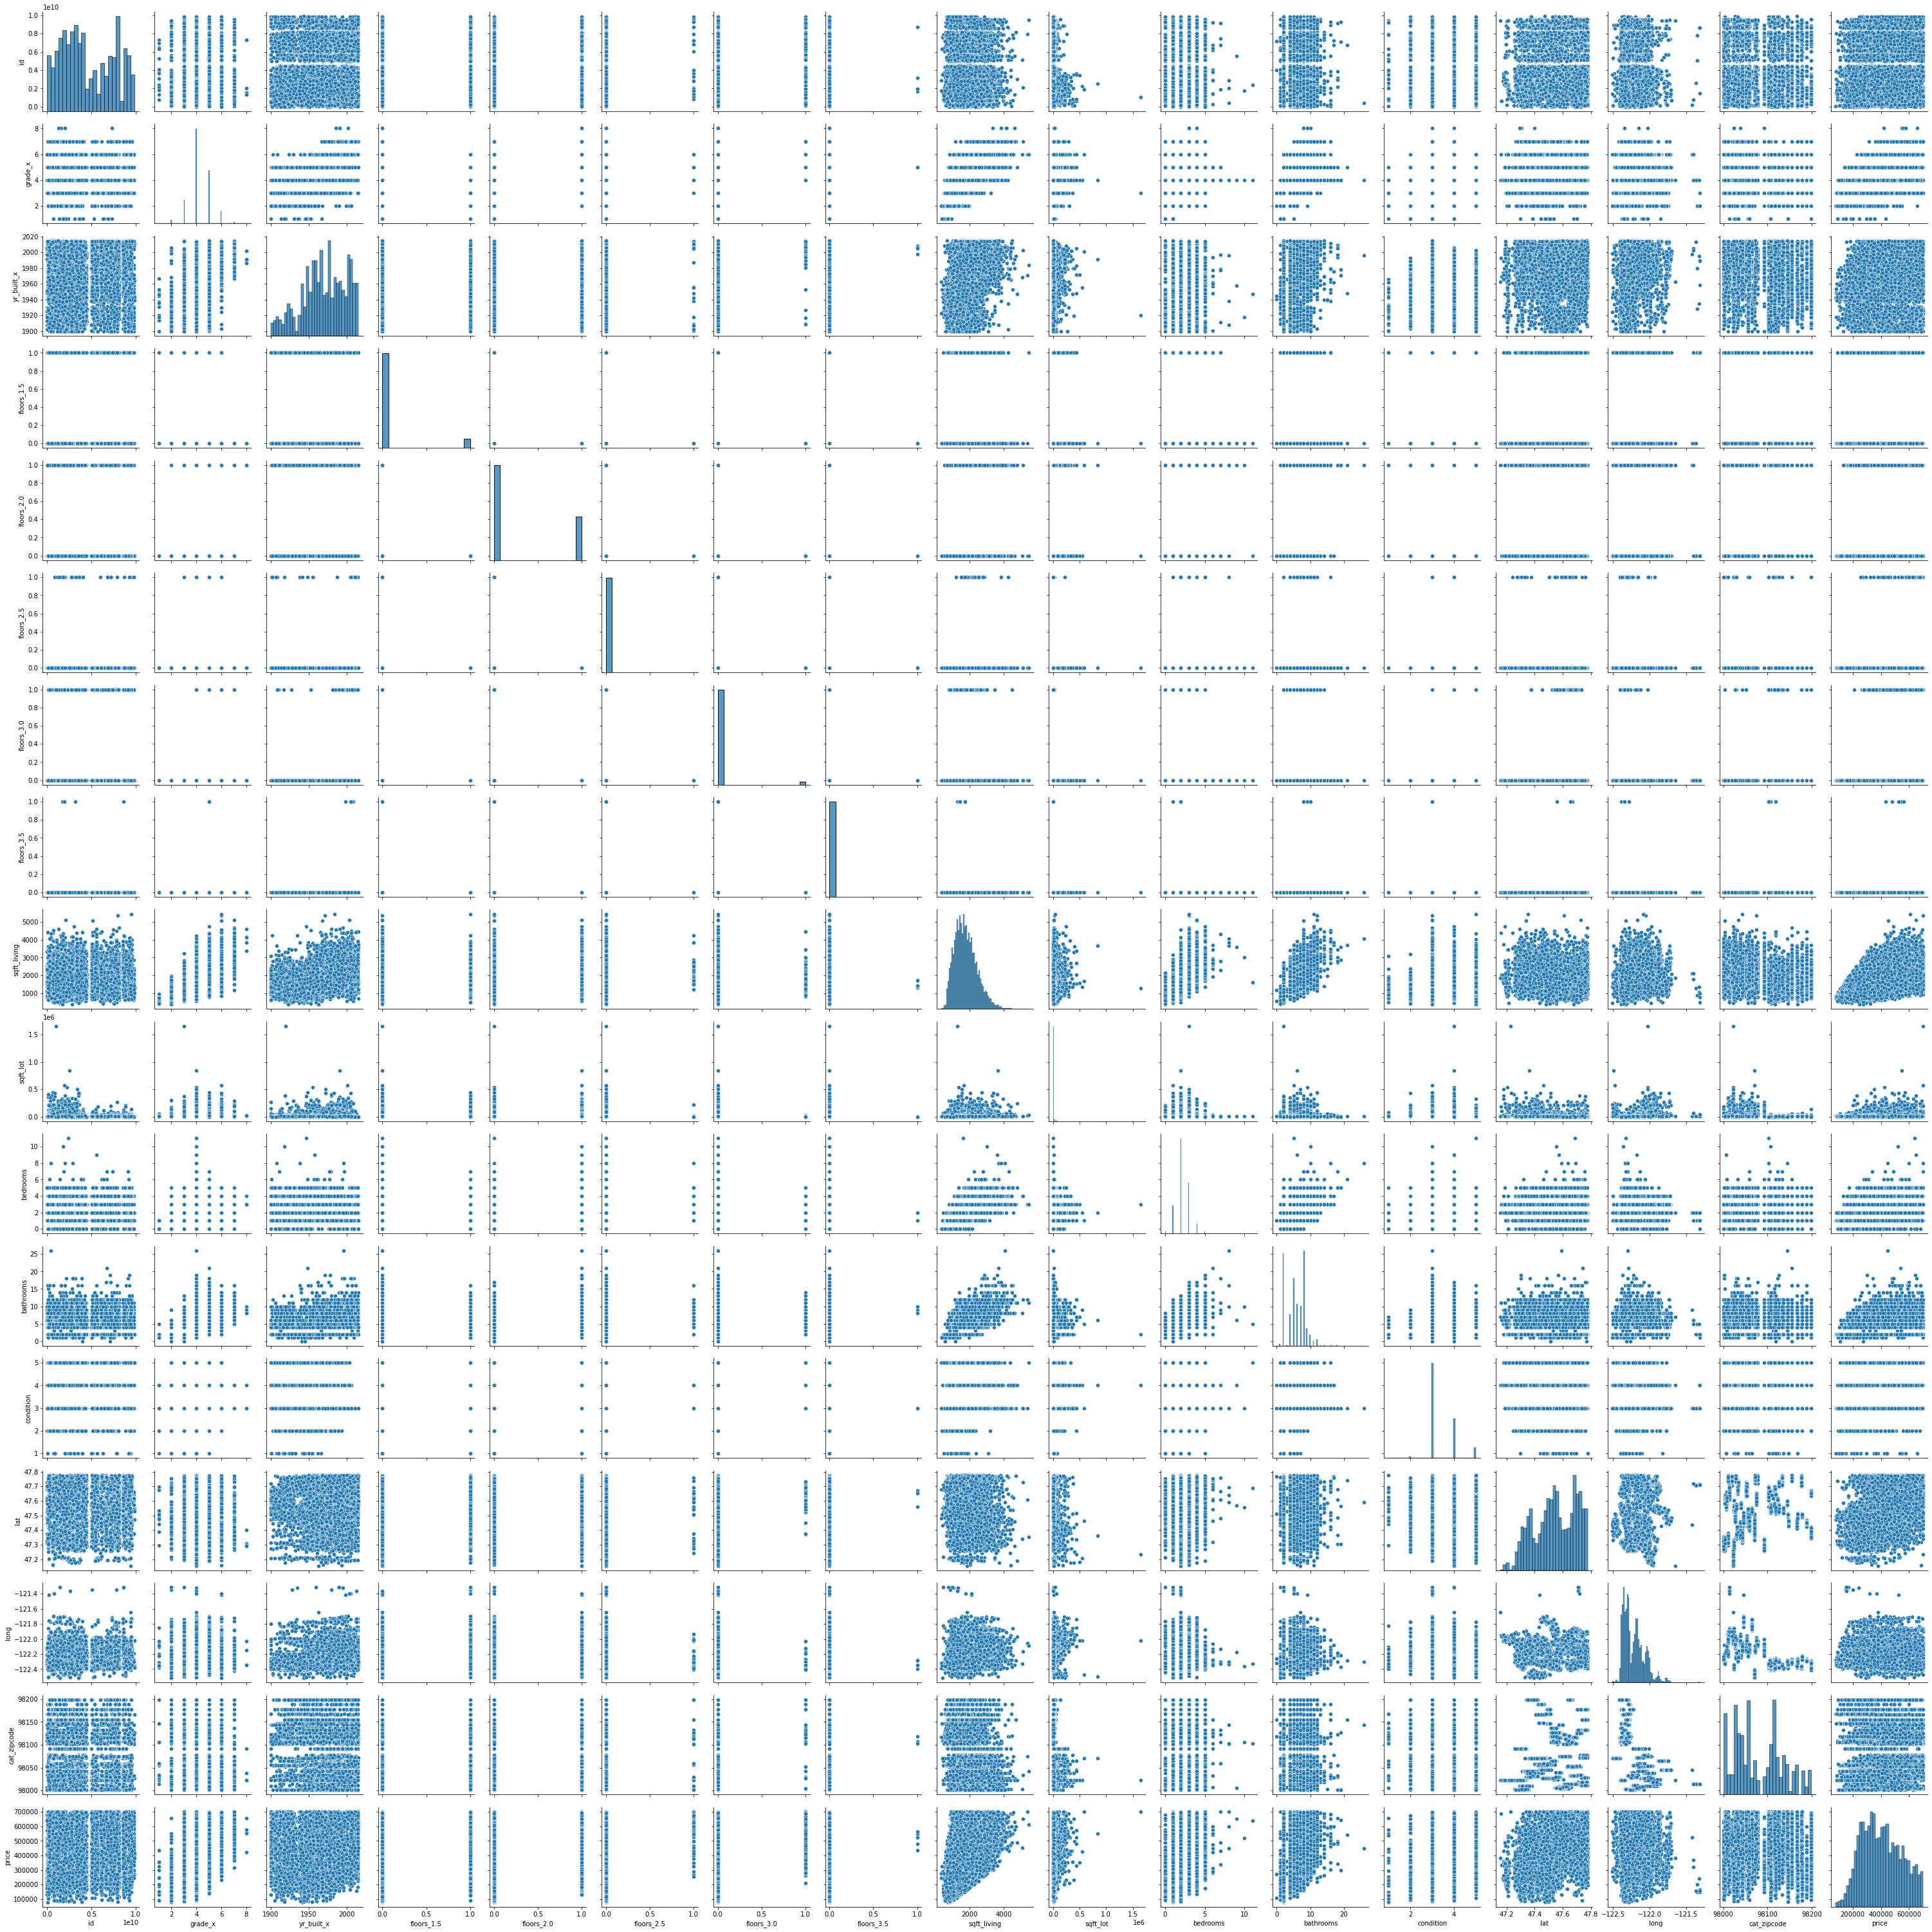

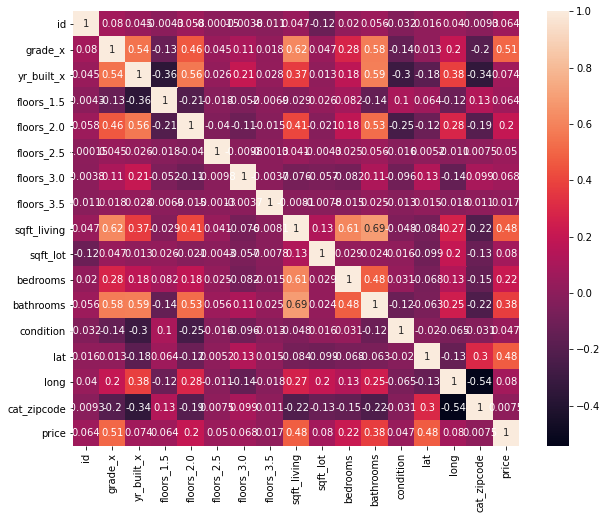

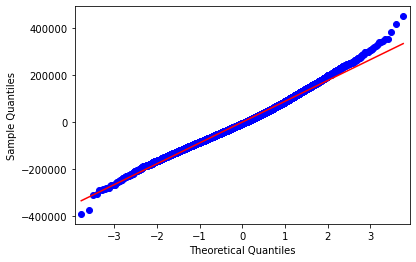

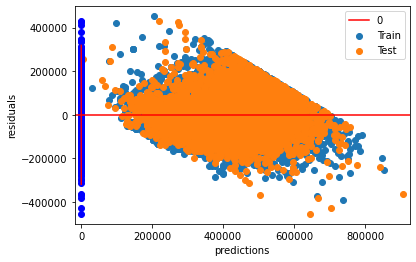

In [272]:
check_assumptions(X_train, y_train, train_preds, test_preds, y_test)

- This came to close to the RMSE of our final Model 
- Quite a large model that we made from all our cleaned data 
- R squared was relatively high